In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *

In [2]:
data=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\66\case_time_series.csv")
data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [3]:
data[data.duplicated()]

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased


In [4]:
data_spt=data[215:]
data_spt.reset_index(inplace=True,drop=True)
data_spt.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,01 September,78168,3766121,62145,2899515,892,66337
1,02 September,82860,3848981,67874,2967389,913,67250
2,03 September,84156,3933137,67491,3034880,979,68229
3,04 September,87115,4020252,69625,3104505,950,69179
4,05 September,90600,4110852,73161,3177666,916,70095


In [5]:
data_spt.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
1,02 September,82860,3848981,67874,2967389,913,67250
2,03 September,84156,3933137,67491,3034880,979,68229
3,04 September,87115,4020252,69625,3104505,950,69179
4,05 September,90600,4110852,73161,3177666,916,70095
5,06 September,91723,4202575,69624,3247290,1008,71103


In [6]:
count1=0
for i in list(data_spt.columns):
    if((True== "NaN" in data_spt[i])or (True == "" in data_spt[i]) or (True == " " in data_spt[i]) or (True == "?" in  data_spt[i])or (True == "####" in data_spt[i])):
        count1=count1+1
if(count1):
    print("yes")
    

In [7]:
colls=data_spt.columns
colls

Index(['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Recovered',
       'Total Recovered', 'Daily Deceased', 'Total Deceased'],
      dtype='object')

In [8]:
for i in range(len(data_spt)):
    data_spt["Date"][i]=data_spt["Date"][i].strip(" September")

for i in range(len(data_spt)):
    data_spt["Date"][i]="2020-09-"+data_spt["Date"][i]

    
data_spt['Date'] = data_spt['Date'].astype('datetime64[ns]') 
data_spt.head()

<ipython-input-8-a8214712fdd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spt["Date"][i]=data_spt["Date"][i].strip(" September")
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-8-a8214712fdd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spt["Date"][i]="2020-09-"+data_spt["

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-09-01,78168,3766121,62145,2899515,892,66337
1,2020-09-02,82860,3848981,67874,2967389,913,67250
2,2020-09-03,84156,3933137,67491,3034880,979,68229
3,2020-09-04,87115,4020252,69625,3104505,950,69179
4,2020-09-05,90600,4110852,73161,3177666,916,70095


In [9]:
data_spt.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
1,2020-09-02,82860,3848981,67874,2967389,913,67250
2,2020-09-03,84156,3933137,67491,3034880,979,68229
3,2020-09-04,87115,4020252,69625,3104505,950,69179
4,2020-09-05,90600,4110852,73161,3177666,916,70095
5,2020-09-06,91723,4202575,69624,3247290,1008,71103


In [10]:
data_spt.to_excel("coviddata_spt.xlsx")

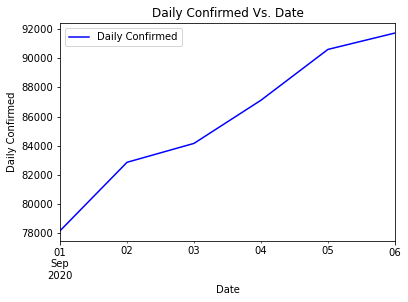

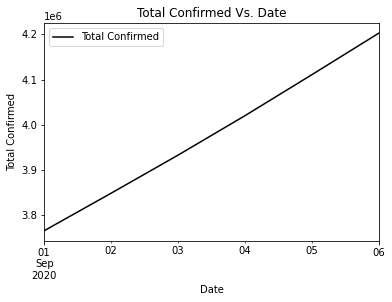

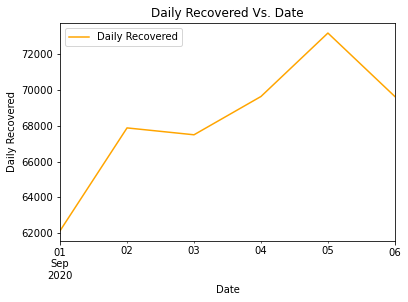

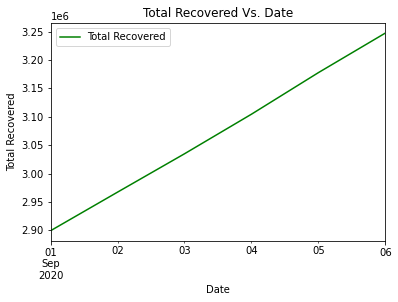

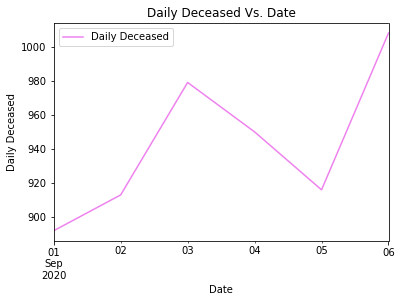

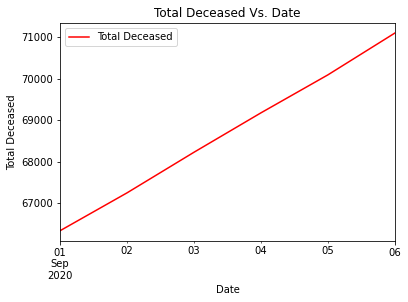

In [11]:
colss=list(data_spt.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    data_spt.plot(x="Date",y=m,color=n)
    plt.title(m +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(m)
    



In [12]:
#data_spt["Date_tmp"]=pd.Series(list(range(1,32)),index=list(range(0,31)))
#data_spt.tail()

In [13]:
#for m in new_cols:
#    fig,axs=plt.subplots(2,2)
#    count=1
#    for i,j,k in zip(range(0,22,7),[[0,0],[0,1],[1,0],[1,1]],["blue","red","orange","green"]):
#        count+=1
 #       a="tab"+":"+k
  #      if(count==5):
   #         x=data_spt["Date_tmp"][i:i+7+3]
    #        y=data_spt[m][i:i+7+3]
     #   else:
      #      x=data_spt["Date_tmp"][i:i+7]
       #     y=data_spt[m][i:i+7]
        #if(count<4):
         #   axs[j[0], j[1]].set_title(m)
        #axs[j[0],j[1]].plot(x,y,a)
        
    

In [14]:
#data_spt=data_spt.drop(['Date_tmp'],axis=1)
#data_spt.head()

In [15]:
dataspt_for_scattering=data_spt.copy()
dataspt_for_scattering.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-09-01,78168,3766121,62145,2899515,892,66337
1,2020-09-02,82860,3848981,67874,2967389,913,67250
2,2020-09-03,84156,3933137,67491,3034880,979,68229
3,2020-09-04,87115,4020252,69625,3104505,950,69179
4,2020-09-05,90600,4110852,73161,3177666,916,70095


In [16]:
dataspt_for_scattering["Date_tmp"]=pd.Series(list(range(1,len(dataspt_for_scattering)+1)),index=list(range(0,len(dataspt_for_scattering))))
dataspt_for_scattering['Date_tmp'] = dataspt_for_scattering['Date_tmp'].astype('int')
colls=list(dataspt_for_scattering.columns)
colls.pop(0)
colls.pop(len(colls)-1)
dataspt_for_scattering.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Date_tmp
0,2020-09-01,78168,3766121,62145,2899515,892,66337,1
1,2020-09-02,82860,3848981,67874,2967389,913,67250,2
2,2020-09-03,84156,3933137,67491,3034880,979,68229,3
3,2020-09-04,87115,4020252,69625,3104505,950,69179,4
4,2020-09-05,90600,4110852,73161,3177666,916,70095,5


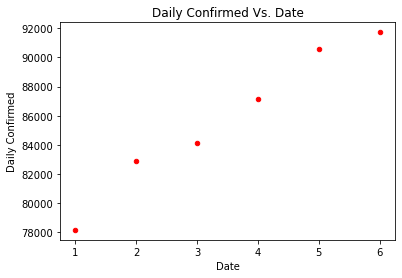

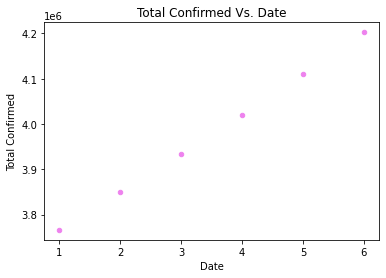

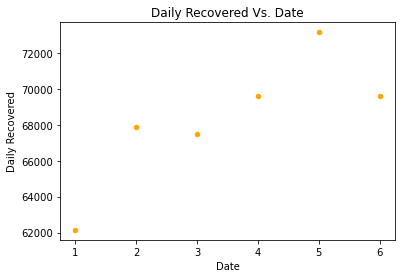

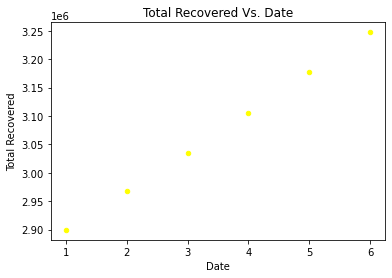

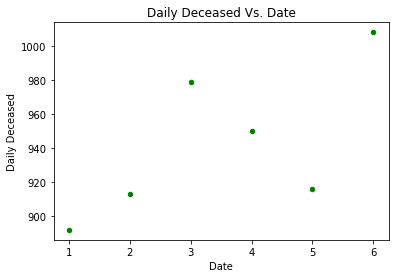

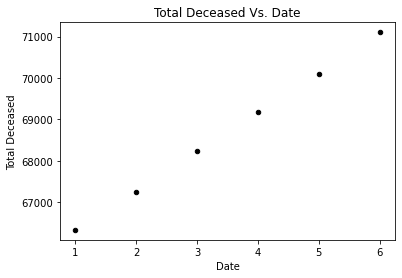

In [17]:
colors=["Red","Violet","Orange","Yellow","Green","Black"]
for i,j in zip(colls,colors):
    dataspt_for_scattering.plot(x="Date_tmp",y=i,kind="scatter",color=j)
    plt.title(i +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(i)

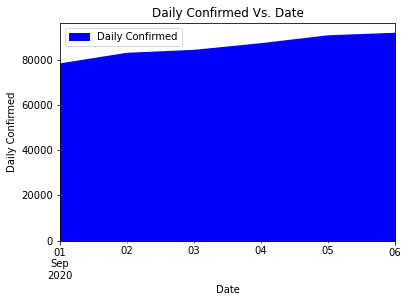

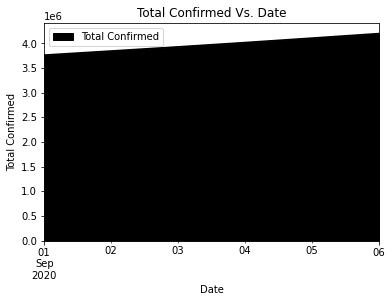

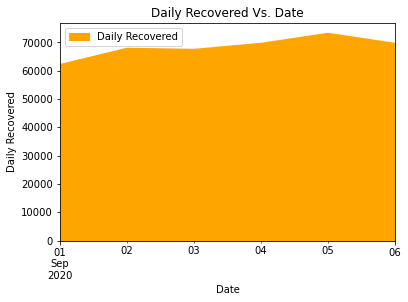

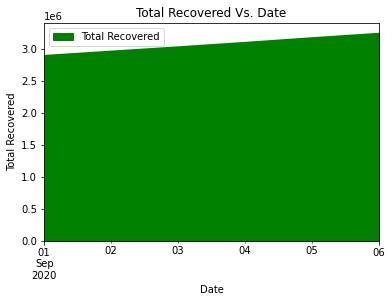

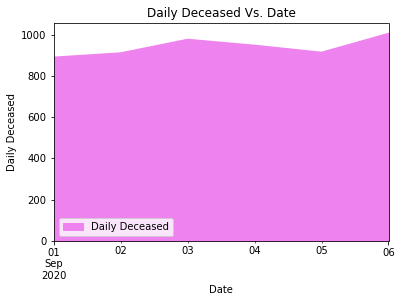

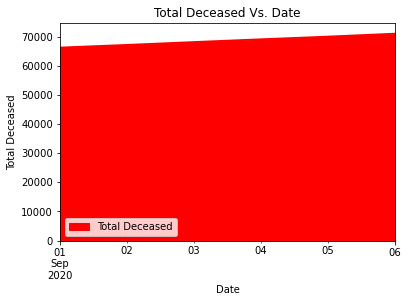

In [18]:
colss=list(data_spt.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    data_spt.plot(x="Date",y=m,color=n,kind="area")
    plt.title(m +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(m)

In [19]:
dataspt_diff=data_spt.copy()
dataspt_diff.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-09-01,78168,3766121,62145,2899515,892,66337
1,2020-09-02,82860,3848981,67874,2967389,913,67250
2,2020-09-03,84156,3933137,67491,3034880,979,68229
3,2020-09-04,87115,4020252,69625,3104505,950,69179
4,2020-09-05,90600,4110852,73161,3177666,916,70095


In [20]:
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
existing_cols=list(dataspt_diff.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[68766,3687953,64435,2837370,816,65445]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    dataspt_diff[i]=list(range(len(dataspt_diff)))
    dataspt_diff[i][0]=dataspt_diff[j][0]-l
    for k in range(0,len(dataspt_diff)-1):
        dataspt_diff[i][k+1]=dataspt_diff[j][k+1]-dataspt_diff[j][k]
        

<ipython-input-20-2f3014b2c743>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataspt_diff[i][0]=dataspt_diff[j][0]-l
<ipython-input-20-2f3014b2c743>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataspt_diff[i][k+1]=dataspt_diff[j][k+1]-dataspt_diff[j][k]


In [21]:
dataspt_diff.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
1,2020-09-02,82860,3848981,67874,2967389,913,67250,4692,82860,5729,67874,21,913
2,2020-09-03,84156,3933137,67491,3034880,979,68229,1296,84156,-383,67491,66,979
3,2020-09-04,87115,4020252,69625,3104505,950,69179,2959,87115,2134,69625,-29,950
4,2020-09-05,90600,4110852,73161,3177666,916,70095,3485,90600,3536,73161,-34,916
5,2020-09-06,91723,4202575,69624,3247290,1008,71103,1123,91723,-3537,69624,92,1008


In [22]:
#dataspt_diff["Total Confirmed"][1]-dataspt_diff["Total Confirmed"][0]==dataspt_diff["Total_Confirmed_Diff"][1]

In [23]:
dataspt_diff.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
count,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,85770.333333,3.980320e+06,68320.000000,3.071874e+06,943.000000,68698.833333,3826.166667,85770.333333,864.833333,68320.000000,32.000000,943.000000
std,5088.017951,1.633327e+05,3629.201124,1.304000e+05,44.271887,1780.897349,3046.861035,5088.017951,3557.871016,3629.201124,54.571055,44.271887
min,78168.000000,3.766121e+06,62145.000000,2.899515e+06,892.000000,66337.000000,1123.000000,78168.000000,-3537.000000,62145.000000,-34.000000,892.000000
25%,83184.000000,3.870020e+06,67586.750000,2.984262e+06,913.750000,67494.750000,1711.750000,83184.000000,-1813.250000,67586.750000,-16.500000,913.750000
50%,85635.500000,3.976694e+06,68749.000000,3.069692e+06,933.000000,68704.000000,3222.000000,85635.500000,875.500000,68749.000000,43.500000,933.000000
75%,89728.750000,4.088202e+06,69624.750000,3.159376e+06,971.750000,69866.000000,4390.250000,89728.750000,3185.500000,69624.750000,73.500000,971.750000
max,91723.000000,4.202575e+06,73161.000000,3.247290e+06,1008.000000,71103.000000,9402.000000,91723.000000,5729.000000,73161.000000,92.000000,1008.000000


In [24]:
kys=["daily_cnf_diff_pos_neg","total_cnf_diff_pos_neg","daily_rcvd_diff_pos_neg","total_rcvd_diff_pos_neg","daily_dcsd_diff_pos_neg","total_dcsd_diff_pos_neg"]
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
pos_neg_dict={}
pos_neg_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dataspt_diff[dataspt_diff[j]>0]
    a.append(pos)
    b.append(len(pos))
    neg=dataspt_diff[dataspt_diff[j]<0]
    a.append(neg)
    b.append(len(neg))
    zro=dataspt_diff[dataspt_diff[j]==0]
    a.append(zro)
    b.append(len(zro))
    pos_neg_dict.update({i:a})
    pos_neg_len_dict.update({i:b})
    a=[]
    b=[]



In [25]:
pos_neg_len_dict

{'daily_cnf_diff_pos_neg': [6, 0, 0],
 'total_cnf_diff_pos_neg': [6, 0, 0],
 'daily_rcvd_diff_pos_neg': [3, 3, 0],
 'total_rcvd_diff_pos_neg': [6, 0, 0],
 'daily_dcsd_diff_pos_neg': [4, 2, 0],
 'total_dcsd_diff_pos_neg': [6, 0, 0]}

In [26]:
dataspt_diff.to_excel("dataspt_diff.xlsx")

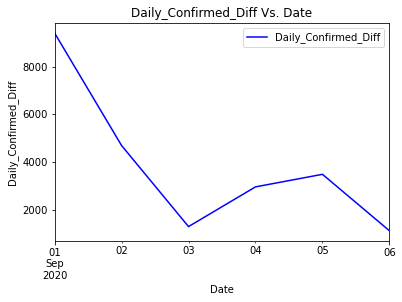

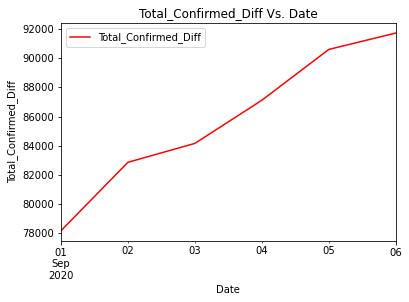

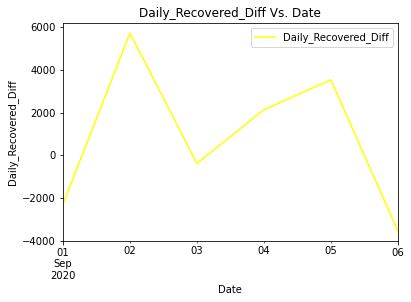

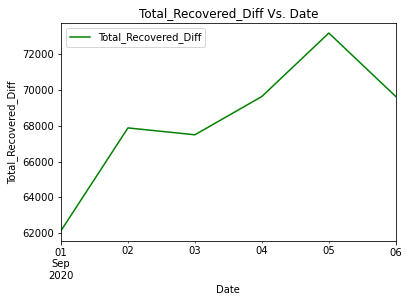

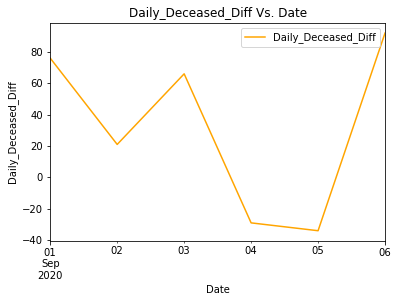

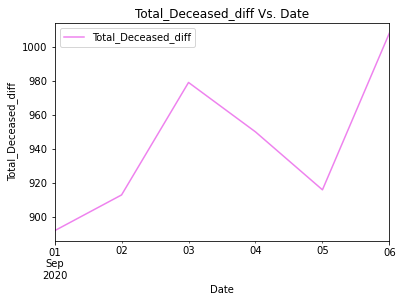

In [27]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dataspt_diff.plot(x="Date",y=i,color=j)
    plt.title(i +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(i)
    

In [28]:
dataspt_ratio_with_precision=data_spt.copy()
dataspt_ratio_with_precision.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-09-01,78168,3766121,62145,2899515,892,66337
1,2020-09-02,82860,3848981,67874,2967389,913,67250
2,2020-09-03,84156,3933137,67491,3034880,979,68229
3,2020-09-04,87115,4020252,69625,3104505,950,69179
4,2020-09-05,90600,4110852,73161,3177666,916,70095


In [29]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dataspt_ratio_with_precision.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[68766,3687953,64435,2837370,816,65445]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    dataspt_ratio_with_precision[i]=list(range(len(dataspt_ratio_with_precision)))
    dataspt_ratio_with_precision[i][0]=round(dataspt_ratio_with_precision[j][0]/l,2)
    tmp=[]
    tmp.append(dataspt_ratio_with_precision[i][0])
    for k in range(0,len(dataspt_ratio_with_precision)-1):
        tmp.append(round(dataspt_ratio_with_precision[j][k+1]/dataspt_ratio_with_precision[j][k],2))
    dataspt_ratio_with_precision[i]=tmp
dataspt_ratio_with_precision.head()
        

<ipython-input-29-3dd790af0403>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataspt_ratio_with_precision[i][0]=round(dataspt_ratio_with_precision[j][0]/l,2)


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-09-01,78168,3766121,62145,2899515,892,66337,1.00,1.00,0.00,1.00,1.00,1.00
1,2020-09-02,82860,3848981,67874,2967389,913,67250,1.06,1.02,1.09,1.02,1.02,1.01
2,2020-09-03,84156,3933137,67491,3034880,979,68229,1.02,1.02,0.99,1.02,1.07,1.01
3,2020-09-04,87115,4020252,69625,3104505,950,69179,1.04,1.02,1.03,1.02,0.97,1.01
4,2020-09-05,90600,4110852,73161,3177666,916,70095,1.04,1.02,1.05,1.02,0.96,1.01


In [30]:
#round(dataspt_ratio_with_precision["Total Confirmed"][1]/dataspt_ratio_with_precision["Total Confirmed"][0],2)==dataspt_ratio_with_precision["Total_Confirmed_Ratio"][1]

In [31]:
dataspt_ratio_with_precision.to_excel("dataspt_ratio_with_precision.xlsx")

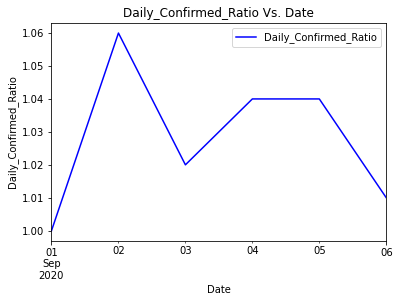

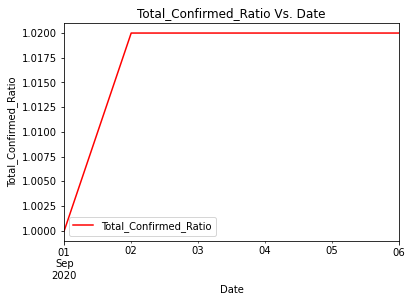

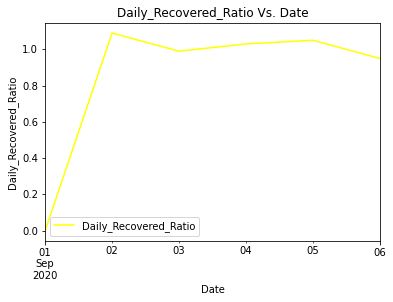

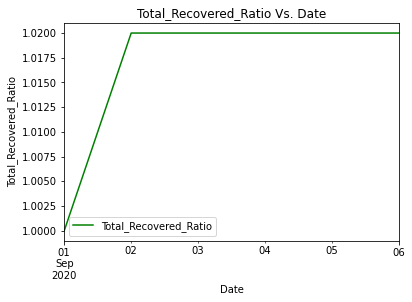

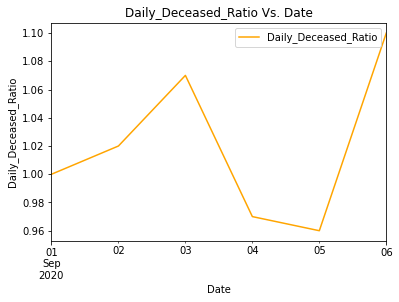

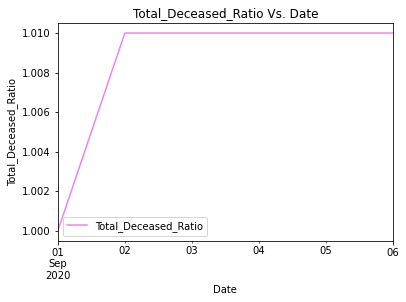

In [32]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dataspt_ratio_with_precision.plot(x="Date",y=i,color=j)
    plt.title(i +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(i)

In [33]:
#dataspt_diff["Date_tmp"]=pd.Series(list(range(1,32)),index=list(range(0,31)))
#dataspt_diff.tail()

In [34]:
#for m in new_cols:
 #   fig,axs=plt.subplots(2,2)
  #  count=1
   # for i,j,k in zip(range(0,22,7),[[0,0],[0,1],[1,0],[1,1]],["blue","red","orange","green"]):
    #    count+=1
     #   a="tab"+":"+k
      #  if(count==5):
       #     x=dataspt_diff["Date_tmp"][i:i+7+3]
        #    y=dataspt_diff[m][i:i+7+3]
        #else:
         #   x=dataspt_diff["Date_tmp"][i:i+7]
          #  y=dataspt_diff[m][i:i+7]
        #if(count<4):
         #   axs[j[0], j[1]].set_title(m)
        #axs[j[0],j[1]].plot(x,y,a)
        
    

In [35]:
#dataspt_diff=dataspt_diff.drop(['Date_tmp'],axis=1)
#dataspt_diff.head()

In [36]:
dataspt_ratio=data_spt.copy()
dataspt_ratio.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-09-01,78168,3766121,62145,2899515,892,66337
1,2020-09-02,82860,3848981,67874,2967389,913,67250
2,2020-09-03,84156,3933137,67491,3034880,979,68229
3,2020-09-04,87115,4020252,69625,3104505,950,69179
4,2020-09-05,90600,4110852,73161,3177666,916,70095


In [37]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dataspt_ratio.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[68766,3687953,64435,2837370,816,65445]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    dataspt_ratio[i]=list(range(len(dataspt_ratio)))
    dataspt_ratio[i][0]=dataspt_ratio[j][0]/l
    tmp=[]
    tmp.append(dataspt_ratio[i][0])
    for k in range(0,len(dataspt_ratio)-1):
        tmp.append(dataspt_ratio[j][k+1]/dataspt_ratio[j][k])
    dataspt_ratio[i]=tmp
dataspt_ratio.head()
        

<ipython-input-37-68568d39c147>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataspt_ratio[i][0]=dataspt_ratio[j][0]/l


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-09-01,78168,3766121,62145,2899515,892,66337,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
1,2020-09-02,82860,3848981,67874,2967389,913,67250,1.060025,1.022001,1.092188,1.023409,1.023543,1.013763
2,2020-09-03,84156,3933137,67491,3034880,979,68229,1.015641,1.021864,0.994357,1.022744,1.072289,1.014558
3,2020-09-04,87115,4020252,69625,3104505,950,69179,1.035161,1.022149,1.031619,1.022942,0.970378,1.013924
4,2020-09-05,90600,4110852,73161,3177666,916,70095,1.040005,1.022536,1.050786,1.023566,0.964211,1.013241


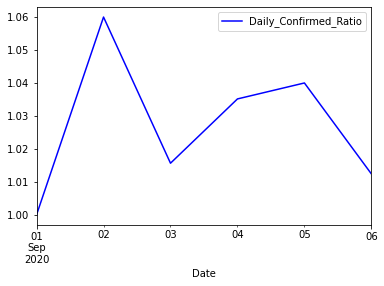

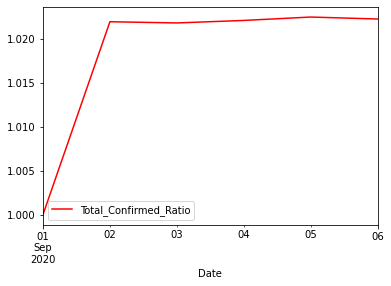

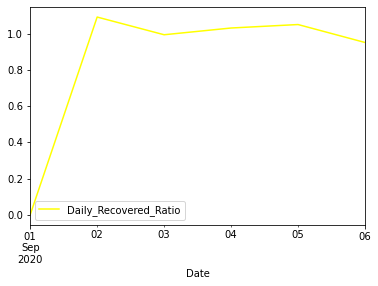

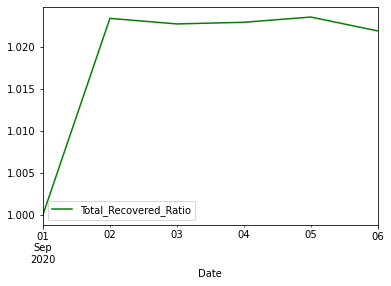

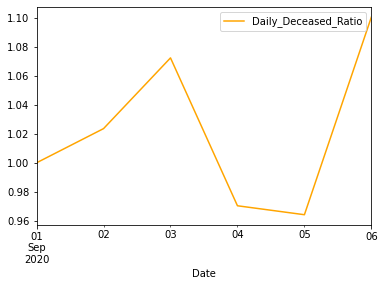

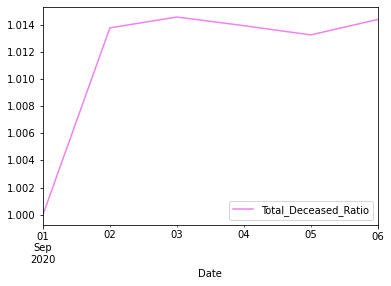

In [38]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dataspt_ratio.plot(x="Date",y=i,color=j)

In [39]:
#dataspt_ratio["Date_tmp"]=pd.Series(list(range(1,32)),index=list(range(0,31)))
#dataspt_ratio.tail()

In [40]:
#for m in new_cols:
 #   fig,axs=plt.subplots(2,2)
  #  count=1
   # for i,j,k in zip(range(0,22,7),[[0,0],[0,1],[1,0],[1,1]],["blue","red","orange","green"]):
    #    count+=1
     #   a="tab"+":"+k
      #  if(count==5):
       #     x=dataspt_ratio["Date_tmp"][i:i+7+3]
        #    y=dataspt_ratio[m][i:i+7+3]
        #else:
         #   x=dataspt_ratio["Date_tmp"][i:i+7]
          #  y=dataspt_ratio[m][i:i+7]
        #if(count<4):
         #   axs[j[0], j[1]].set_title(m)
        #axs[j[0],j[1]].plot(x,y,a)
        
    

In [41]:
#dataspt_ratio=dataspt_ratio.drop(['Date_tmp'],axis=1)
#dataspt_ratio.head()

In [42]:
kys=["daily_cnf_diff_rat10","total_cnf_diff_rat10","daily_rcvd_diff_rat10","total_rcvd_diff_rat10","daily_dcsd_diff_rat10","total_dcsd_diff_rat10"]
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
one_zro_dict={}
one_zro_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dataspt_ratio[dataspt_ratio[j]>=1]
    a.append(pos)
    b.append(len(pos))
    neg=dataspt_ratio[dataspt_ratio[j]<1]
    a.append(neg)
    b.append(len(neg))
    zro=dataspt_ratio[dataspt_ratio[j]==0]
    a.append(zro)
    b.append(len(zro))
    one_zro_dict.update({i:a})
    one_zro_len_dict.update({i:b})
    a=[]
    b=[]




In [43]:
dataspt_ratio.to_excel("dataspt_ratio.xlsx")

In [44]:
dataspt_ratio_analysis=data_spt.copy()
dataspt_ratio_analysis.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-09-01,78168,3766121,62145,2899515,892,66337
1,2020-09-02,82860,3848981,67874,2967389,913,67250
2,2020-09-03,84156,3933137,67491,3034880,979,68229
3,2020-09-04,87115,4020252,69625,3104505,950,69179
4,2020-09-05,90600,4110852,73161,3177666,916,70095
